###BOSTON HOUSE PRICE  PREDICTION

Discription: In this dataset each rows and column describe feature of boston house

Objective: The problem we are going to solve here is that the given dataset have feature that describe a house in boston and we have to predict the price by help of our model in Machine Learning

Import librar

In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Import dataset


In [173]:
from sklearn.datasets import load_boston
boston = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [174]:
# Check the shape of dataframe
boston.data.shape

(506, 13)

In [175]:
# Check the features name of dataframe
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [176]:
my_data = pd.DataFrame(boston.data)
my_data.columns = boston.feature_names
# Check the head
my_data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [177]:
boston.target.shape

(506,)

 Adding 'class' (target) column to the dataset

In [178]:
my_data['class'] = boston.target
my_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,class
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Describe dataset

In [179]:
# Viewing the data statistics
my_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,class
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [180]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  class    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [181]:
my_data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
class      float64
dtype: object

In [182]:
# Check for missing value
my_data.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [183]:
# Identifying the unique number of values in the dataset
my_data.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
class      229
dtype: int64

correlation matrix

In [184]:
corr=my_data.corr()
corr.shape

(14, 14)

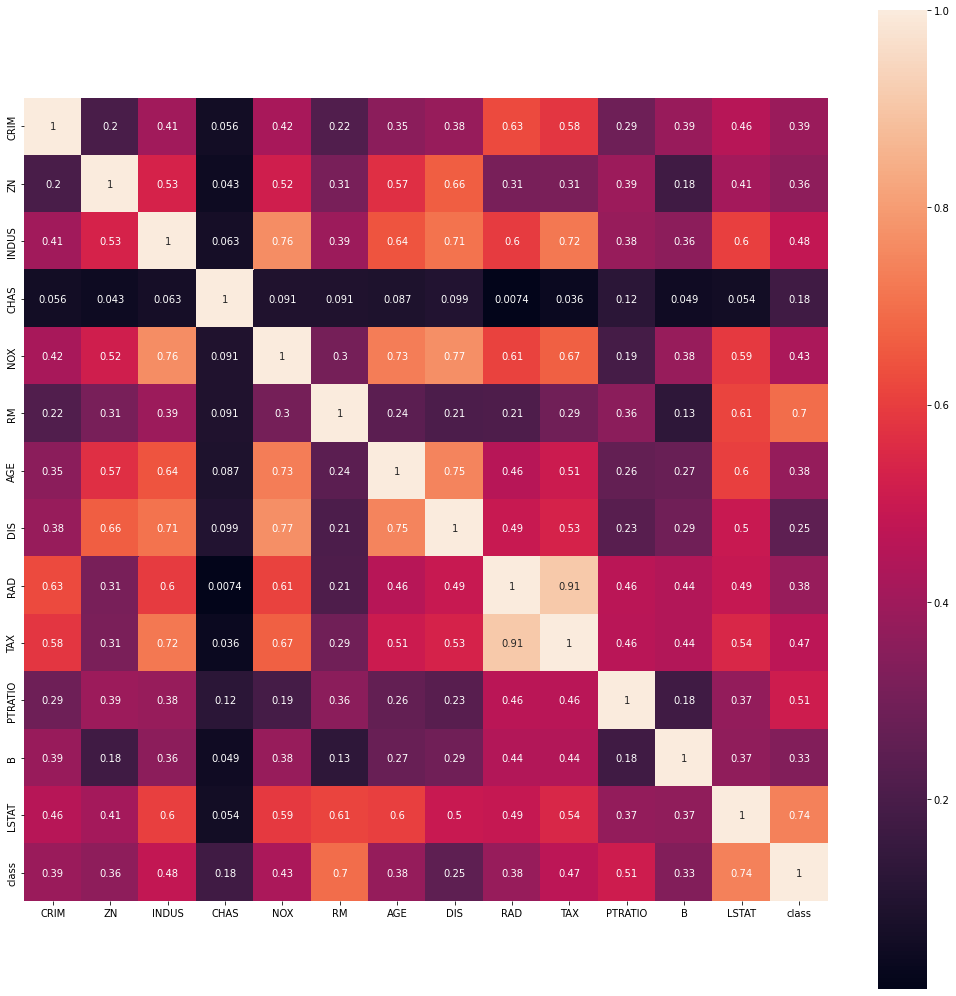

In [202]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(18, 18))
sns.heatmap(my_data.corr().abs(),square=True,  annot=True)

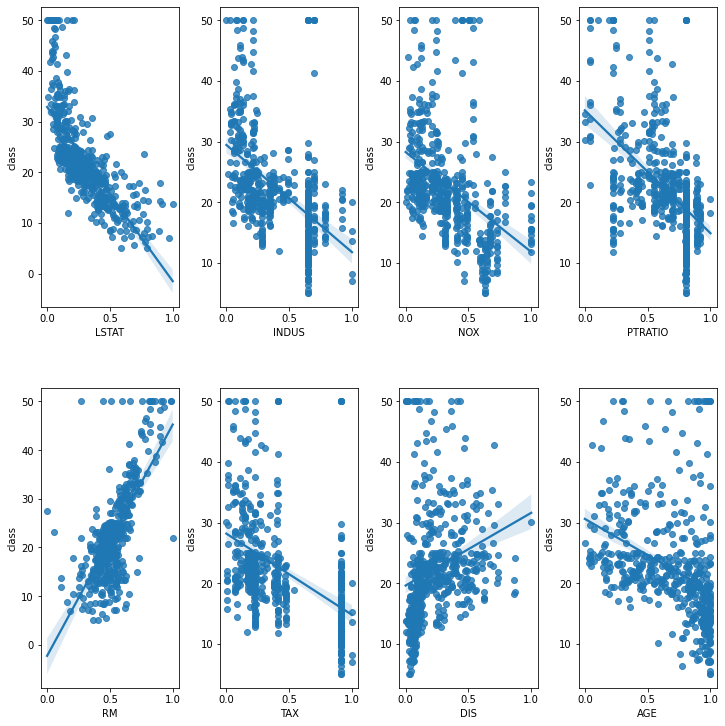

In [186]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = my_data.loc[:,column_sels]
y = my_data['class']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(10,10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [187]:
x = boston.data
print(x)



[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [188]:
y = boston.target
print(y)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

Split dataset in trainig and testing

In [189]:
from sklearn.model_selection import train_test_split
 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.3,
                                                    random_state = 0)
  
print("x_train shape : ", x_train.shape)
print("x_test shape  : ", x_test.shape)
print("y_train shape : ", y_train.shape)
print("y_test shape  : ", y_test.shape)

x_train shape :  (354, 13)
x_test shape  :  (152, 13)
y_train shape :  (354,)
y_test shape  :  (152,)


Linear regression

In [190]:
# Import library for Liner Regression
from sklearn.linear_model import LinearRegression
# Create a Linear regressor
classifier = LinearRegression()
#  Use the training sets  to train the model 
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print(y_pred)

[24.9357079  23.75163164 29.32638296 11.97534566 21.37272478 19.19148525
 20.5717479  21.21154015 19.04572003 20.35463238  5.44119126 16.93688709
 17.15482272  5.3928209  40.20270696 32.31327348 22.46213268 36.50124666
 31.03737014 23.17124551 24.74815321 24.49939403 20.6595791  30.4547583
 22.32487164 10.18932894 17.44286422 18.26103077 35.63299326 20.81960303
 18.27218007 17.72047628 19.33772473 23.62254823 28.97766856 19.45036239
 11.13170639 24.81843595 18.05294835 15.59712226 26.21043403 20.81140432
 22.17349382 15.48367365 22.62261604 24.88561528 19.74754478 23.0465628
  9.84579105 24.36378793 21.47849008 17.62118176 24.39160873 29.95102691
 13.57219422 21.53645439 20.53306273 15.03433182 14.3232289  22.11929299
 17.07321915 21.54141094 32.96766968 31.371599   17.7860591  32.75069556
 18.74795323 19.21428022 19.41970047 23.08087809 22.87732816 24.06399098
 30.52824406 28.71453508 25.90763165  5.17596718 36.8709072  23.76983849
 27.26064379 19.25849042 28.41860517 19.3008798  18.9

In [191]:
# Value of y intercept
classifier.intercept_

37.93710774183309

Model Evaluation

In [192]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Square Error : ", mse)

Mean Square Error :  27.195965766883408


In [193]:
mae = mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error : ", mae)

Mean Absolute Error :  3.6099040603818096


In [194]:
from sklearn import metrics
RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("Root mean square error:",RMSE)

Root mean square error: 5.214975145375423


Plotting Scatter graph to show the prediction

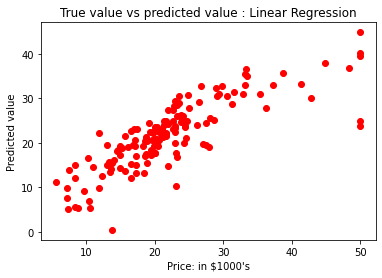

In [195]:
plt.scatter(y_test, y_pred, c = 'Red')
plt.xlabel("Price: in $1000's")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Linear Regression")
plt.show()


Random Forest Regressor

In [196]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

#  Use the training sets  to train the model 
reg.fit(x_train, y_train)
y_pred = reg.predict(x_train)
print(y_pred)

[14.372 24.219 18.121 23.325 19.553 15.462 18.191 13.961  9.168 18.622
 34.483 32.501 32.437 21.321 21.146 25.072 25.179 12.391 29.049 12.511
 18.315 26.239 20.612 10.439 18.077 19.229 28.404 21.394 15.016 13.235
 19.57  22.263 19.342 24.597 25.233 26.257 45.789 14.779 11.519 30.894
 29.574 17.109 44.534 24.872 23.091 20.109 22.756 45.132 23.178 19.643
 42.685 34.214 14.23  24.965 20.656 24.245 21.211 22.652 26.931 25.701
 11.074 20.151 19.183 10.314 14.674 25.996 14.161 34.786 15.393 20.244
 17.781 15.359 21.228 21.342 13.466 19.217 23.807 19.477 14.288 22.661
 22.763 30.917 20.687 22.961 15.635 21.595 35.936 18.998 30.133 23.22
 20.465 17.009 34.704 24.282 32.031 15.991 32.036 13.705 15.264 14.398
 13.138 42.071 18.283 13.557 29.035 21.615 17.073 33.526 24.803 24.148
 20.71  23.684 19.703 10.709 21.225 26.366 18.27  14.149 26.634 14.916
 17.2   28.327 14.154 19.636 11.34  14.105 21.92  19.918 19.129 23.04
 21.09  24.118 12.518 34.477 21.868 49.131 27.865 31.012 21.601 15.711
 22.524 

Model Evaluation


In [197]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_train, y_pred)
print("Mean Square Error : ", mse)

Mean Square Error :  1.5934940536723161


In [198]:
mae = mean_absolute_error(y_train,y_pred)
print("Mean Absolute Error : ", mae)

Mean Absolute Error :  0.8051440677966095


In [199]:
from sklearn import metrics
RMSE=np.sqrt(metrics.mean_squared_error(y_train, y_pred))
print("Root mean square error:",RMSE)

Root mean square error: 1.262336743374095


Plotting Scatter graph to show the prediction

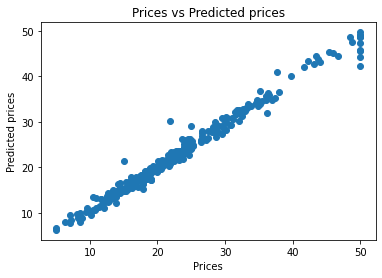

In [200]:
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()